In [3]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [4]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
mnist = tf.keras.datasets.mnist

In [5]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

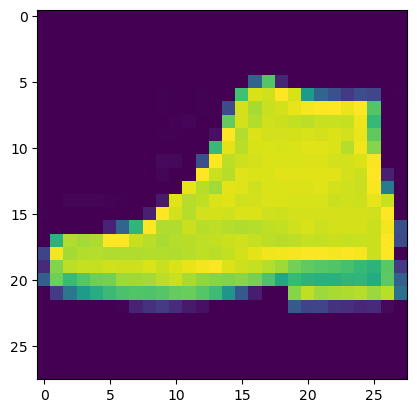

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [7]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [18]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [10]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs) #softmax = np.exp(1)/(np.exp(1)+np.exp(3)+np.exp(4)+np.exp(2))
print(f'output of softmax function: {outputs.numpy()}')

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [11]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}') #sum should be 1

sum of outputs: 1.0


In [12]:
# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

class with highest probability: 2


In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10) #batch size defaults to 32. 60000/32=1875

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4736 - accuracy: 0.8316
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3619 - accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3212 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2967 - accuracy: 0.8899
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2649 - accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2528 - accuracy: 0.9060
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2423 - accuracy: 0.9084
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2321 - accuracy: 0.9127
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.221

In [20]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3264 - accuracy: 0.8868


[0.3264382779598236, 0.8867999911308289]

In [ ]:
test_images

In [26]:
classifications = model.predict(test_images)

In [27]:
print(classifications[0])

[5.3363952e-10 1.7324639e-10 3.0400034e-12 2.3276547e-14 5.4827510e-12 6.5134787e-05 3.1426461e-09 3.1752368e-03 1.0714332e-11 9.9675959e-01]


In [28]:
print(test_labels[0])

9


In [32]:
np.argmax(classifications[0]) #index 9 has the highest probability

9

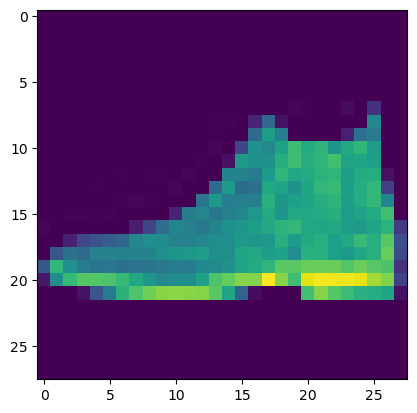

In [33]:
plt.imshow(test_images[0])
plt.show()

In [34]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

In [42]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [43]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['mae', 'acc'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4730 - mae: 4.4200 - acc: 0.8311
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3606 - mae: 4.4200 - acc: 0.8679
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3212 - mae: 4.4200 - acc: 0.8814
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2962 - mae: 4.4200 - acc: 0.8905
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2793 - mae: 4.4200 - acc: 0.8957


In [44]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step - loss: 0.3428 - mae: 4.4200 - acc: 0.8764


In [45]:
print(classifications[0])
print(test_labels[0])

[8.2599738e-10 1.4258050e-09 1.1283759e-09 5.1499149e-11 2.7482903e-09 1.3856086e-02 1.1865048e-08 3.3254479e-03 8.8523763e-08 9.8281831e-01]
9


In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [47]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['mae', 'acc'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4718 - mae: 4.4200 - acc: 0.8302
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3569 - mae: 4.4200 - acc: 0.8691
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3209 - mae: 4.4200 - acc: 0.8818
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2955 - mae: 4.4200 - acc: 0.8899
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2775 - mae: 4.4200 - acc: 0.8970


In [48]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.8312
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4735 - accuracy: 0.8313
